<a href="https://colab.research.google.com/github/RuthStowers/MAT422/blob/main/Homework_1.3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1.3 - Linear Regression


---



# 1.3.1 QR Decomposition
QR decomposition is a useful procedure to solve the linear least squares
problem. QR factorization takes the general form $A = QR$ where $Q$ is the product of the Gram-Schmidt process, and $R$ is an upper triangular matrix as follows.

In [1]:
import numpy as np

In [3]:
A = np.random.randint(10, size = (3, 3))
q, r = np.linalg.qr(A)
print('A: \n', A, '\n')
print('Q: \n', q, '\n')
print('R: \n', r, '\n')

A: 
 [[2 2 8]
 [8 0 8]
 [7 2 9]] 

Q: 
 [[-0.18490007  0.73994007 -0.64676167]
 [-0.73960026 -0.53813824 -0.40422604]
 [-0.64715023  0.40360368  0.64676167]] 

R: 
 [[-10.81665383  -1.66410059 -13.22035468]
 [  0.           2.2870875    5.24684779]
 [  0.           0.          -2.58704667]] 



In [4]:
p = (np.matmul(q, r))
print(p, '\n')
print(A)


[[ 2.00000000e+00  2.00000000e+00  8.00000000e+00]
 [ 8.00000000e+00 -7.42777761e-16  8.00000000e+00]
 [ 7.00000000e+00  2.00000000e+00  9.00000000e+00]] 

[[2 2 8]
 [8 0 8]
 [7 2 9]]


As you can see from the above code, $Q$ dotted with $R$ gives us back $A$.



# 1.3.2 Least-squares Problems
We are trying to solve for the system $Ax = b$ where $A$ is an $n$ x $m$ matrix and $n > m$. If $n = m$, then we could just find the matrix inverse.
Instead, we find an $Ax$ such that we minimize $\|Ax-b\|$.

In [5]:
b = np.random.randint(10, size = (3, 1))
x = np.matmul(np.matmul(np.linalg.inv(r),np.transpose(q)), b)
Ax = np.matmul(A, x)
print('solution vector: \n', x, '\n')
print('b: \n', b, '\n')
print('Ax: \n', Ax, '\n')


solution vector: 
 [[-0.75]
 [-0.75]
 [ 0.75]] 

b: 
 [[3]
 [0]
 [0]] 

Ax: 
 [[3.]
 [0.]
 [0.]] 



As you can see from the above code, we generate a random $b$ vector and use the random $A, Q, R$ values from the previous QR decomposition example. $Ax$ should give a close approximation to $b$.

# 1.3.3 Linear Regression
Linear regression seeks to find an affine function to fit a data set as closely as possible. This is a minimization problem and when looked at in matrix form, is the exact same as the least-squares problem. Linear Regression is often used as a method of statistical analysis.

Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


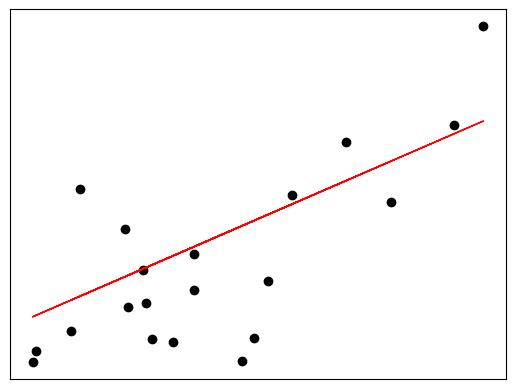

In [7]:
print(__doc__)


# Code source: Jaques Grobler
# link: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()